In [1]:
import pandas as pd

# Load dataset
df = pd.read_csv("E:\\learning\\Pwork\\teen_mobile_addiction\\data\\teen_phone_addiction_dataset.csv")

# Select only the relevant columns
selected_columns = [
    'Age',
    'Gender',
    'Daily_Usage_Hours',
    'Sleep_Hours',
    'Time_on_Social_Media',
    'Screen_Time_Before_Bed',
    'Family_Communication',
    'Addiction_Level'
]

df = df[selected_columns]

# Preview the data
df.head()


,Age,Gender,Daily_Usage_Hours,Sleep_Hours,Time_on_Social_Media,Screen_Time_Before_Bed,Family_Communication,Addiction_Level
0,13,Female,4.0,6.1,3.6,1.4,4,10.0
1,17,Female,5.5,6.5,1.1,0.9,2,10.0
2,13,Other,5.8,5.5,0.3,0.5,6,9.2
3,18,Female,3.1,3.9,3.1,1.4,8,9.8
4,14,Other,2.5,6.7,2.6,1.0,10,8.6


In [2]:
from sklearn.preprocessing import OneHotEncoder

# Check for missing values
print("Missing values:\n", df.isnull().sum())

# One-hot encode Gender
df = pd.get_dummies(df, columns=['Gender'], drop_first=True)

# Add binary label based on Addiction_Level threshold
df['Is_Addicted'] = (df['Addiction_Level'] > 6.5).astype(int)

# View updated dataframe
df.head()


Missing values:
 Age                       0
Gender                    0
Daily_Usage_Hours         0
Sleep_Hours               0
Time_on_Social_Media      0
Screen_Time_Before_Bed    0
Family_Communication      0
Addiction_Level           0
dtype: int64


,Age,Daily_Usage_Hours,Sleep_Hours,Time_on_Social_Media,Screen_Time_Before_Bed,Family_Communication,Addiction_Level,Gender_Male,Gender_Other,Is_Addicted
0,13,4.0,6.1,3.6,1.4,4,10.0,0,0,1
1,17,5.5,6.5,1.1,0.9,2,10.0,0,0,1
2,13,5.8,5.5,0.3,0.5,6,9.2,0,1,1
3,18,3.1,3.9,3.1,1.4,8,9.8,0,0,1
4,14,2.5,6.7,2.6,1.0,10,8.6,0,1,1


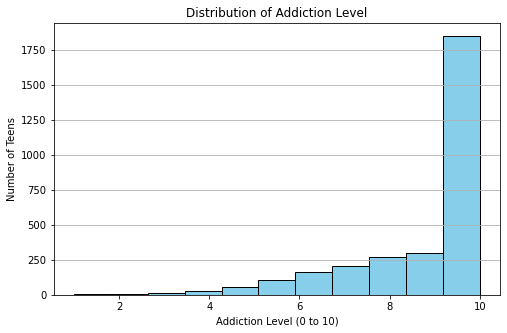

In [3]:
import matplotlib.pyplot as plt

# Histogram of Addiction Level
plt.figure(figsize=(8,5))
plt.hist(df['Addiction_Level'], bins=11, edgecolor='black', color='skyblue')
plt.title("Distribution of Addiction Level")
plt.xlabel("Addiction Level (0 to 10)")
plt.ylabel("Number of Teens")
plt.grid(axis='y')
plt.show()


In [4]:
from sklearn.model_selection import train_test_split

# Features (X) — drop both targets
X = df.drop(columns=['Addiction_Level', 'Is_Addicted'])

# Target for regression
y_reg = df['Addiction_Level']

# Target for classification
y_clf = df['Is_Addicted']

# Split for regression
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X, y_reg, test_size=0.2, random_state=42)

# Split for classification
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X, y_clf, test_size=0.2, random_state=42)

print("Train/Test split completed.")


Train/Test split completed.


In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Training model
reg_model = LinearRegression()
reg_model.fit(X_train_reg, y_train_reg)

# Predicting on test data
y_pred_reg = reg_model.predict(X_test_reg)

# Evaluateing
mse = mean_squared_error(y_test_reg, y_pred_reg)
r2 = r2_score(y_test_reg, y_pred_reg)

print("Regression Results:")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")


Regression Results:
Mean Squared Error: 1.15
R² Score: 0.55


In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Train classifier
clf_model = RandomForestClassifier(random_state=42)
clf_model.fit(X_train_clf, y_train_clf)

# Predict
y_pred_clf = clf_model.predict(X_test_clf)

# Evaluate
acc = accuracy_score(y_test_clf, y_pred_clf)
conf_mat = confusion_matrix(y_test_clf, y_pred_clf)
report = classification_report(y_test_clf, y_pred_clf)

print("Classification Results:")
print(f"Accuracy: {acc:.2f}")
print("\nConfusion Matrix:")
print(conf_mat)
print("\nClassification Report:")
print(report)


Classification Results:
Accuracy: 0.91

Confusion Matrix:
[[ 20  44]
 [ 12 524]]

Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.31      0.42        64
           1       0.92      0.98      0.95       536

    accuracy                           0.91       600
   macro avg       0.77      0.65      0.68       600
weighted avg       0.89      0.91      0.89       600



In [11]:
import pickle

# Save model
with open("model-teen-phone-addiction.pkl", "wb") as f:
    pickle.dump(reg_model, f)
